In [1]:
import pysal as ps
import scipy.sparse as spar
from scipy import stats as st
import numpy as np
import sklearn.metrics.pairwise as skm
import seaborn.apionly as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import copy
import pandas as pd
%matplotlib inline

In [3]:
df = gpd.read_file('./cb_2015_us_county_500k_2.geojson')
W = ps.weights.Rook.from_dataframe(df)

/home/ljw/anaconda3/envs/ana/lib/python3.6/site-packages/pysal/weights/weights.py:189: UserWarning: There are 9 disconnected observations
  warnings.warn("There are %d disconnected observations" % ni)
/home/ljw/anaconda3/envs/ana/lib/python3.6/site-packages/pysal/weights/weights.py:190: UserWarning: Island ids: 11, 79, 671, 697, 725, 1061, 1217, 1221, 3199
  warnings.warn("Island ids: %s" % ', '.join(str(island) for island in self.islands))


In [4]:
df.crs = {'init':'epsg:4236', 'no_defs':True}

In [5]:
df = df.to_crs(epsg=5070)

In [6]:
df.drop(W.islands,inplace=True)
W = ps.weights.Rook.from_dataframe(df)

In [7]:
df['pct_old'] = df.male_over_85 / df.total_pop
df['log_pop'] = np.log(df.total_pop)

In [8]:
attributes = ['log_pop','pct_old','median_income']

In [9]:
contig = df.query('statefp not in ("02", "15", "72")') #filter out PR, AK, HI
W_contig = ps.weights.Rook.from_dataframe(contig)

In [10]:
#contig.plot(linewidth=0)

In [11]:
Xmat = df[attributes].values
Xmat = (Xmat - Xmat.mean(axis=0)) / Xmat.std(axis=0)
Xmat = np.hstack((np.ones((W.n, 1))*10, Xmat))

In [12]:
Xc = contig[attributes].values
Xc = (Xc - Xc.mean(axis=0)) / Xc.std(axis=0)
Xc_10 = np.hstack((np.ones((W_contig.n, 1))*10, Xc))
Xc_1 = np.hstack((np.ones((W_contig.n, 1))*1, Xc))

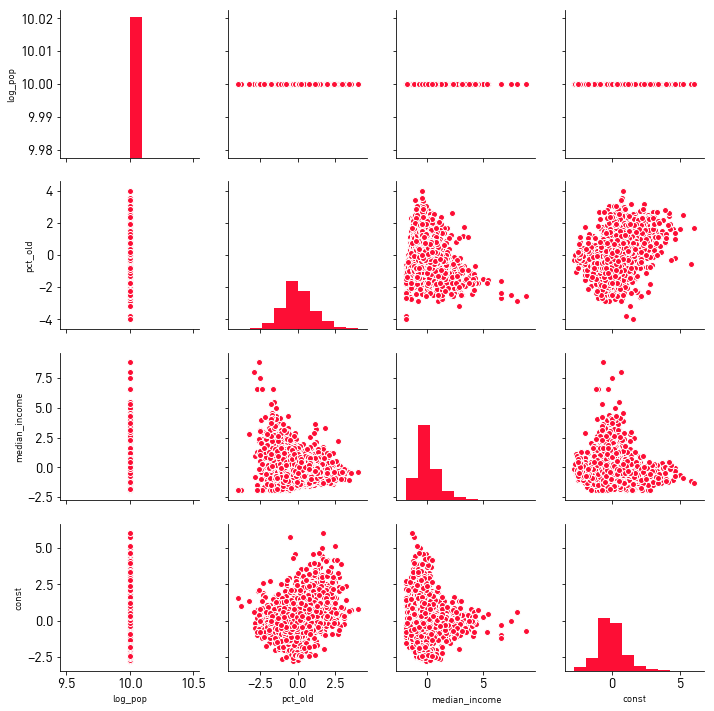

In [13]:
sns.pairplot(pd.DataFrame(Xmat,columns=attributes + ['const']))

In [14]:
import imp
import skater
imp.reload(skater)

<module 'skater' from '/home/ljw/Dropbox/dev/bounder/skater.py'>

In [15]:
skater_ = 

SyntaxError: invalid syntax (<ipython-input-15-25ada045eb07>, line 1)

In [ ]:
Xc[:,1:].shape

In [93]:
def compose10_center(x, axis=0):
    return np.hstack((x[:,0].sum()*10, x[:,1:].mean(axis=axis)))
def compose1_center(x, axis=0):
    return np.hstack((x[:,0].sum()*1, x[:,1:].mean(axis=axis)))

In [102]:
def compose_reduce(x, axis=0):
    

<function numpy.core.fromnumeric.sum>

In [95]:
skinf8 = skater.Spanning_Forest(center=compose10_center)\
                .fit(np.inf, W=W_contig, data=Xc_1, 
                     quorum = 100, trace=True) # if you want to find all available clusters above the quorum
sk8r = skater.Spanning_Forest(center=compose10_center)\
                .fit(8, W=W_contig, data=Xc_1, 
                     quorum = 100, trace=True) # if you want to find exactly n clusters
skinf1 = skater.Spanning_Forest(center=compose1_center)\
                .fit(np.inf, W=W_contig, data=Xc_1, 
                     quorum = 100, trace=True) # if you want to find exactly n clusters
sk1r = skater.Spanning_Forest(center=compose1_center)\
                .fit(8, W=W_contig, data=Xc_1, 
                     quorum = 100, trace=True) # if you want to find exactly n clusters

/home/ljw/anaconda3/envs/ana/lib/python3.6/site-packages/ipykernel_launcher.py:2: OptimizeWarning: MSF contains no valid moves after finding 21 subtrees.Decrease the size of your quorum to find the remaining inf subtrees.
  
/home/ljw/anaconda3/envs/ana/lib/python3.6/site-packages/ipykernel_launcher.py:6: OptimizeWarning: MSF contains no valid moves after finding 21 subtrees.Decrease the size of your quorum to find the remaining inf subtrees.
  


In [96]:
skinf8._elapsed_time, sk8r._elapsed_time, skinf1._elapsed_time, sk1r._elapsed_time

(43.44516706466675, 14.746848583221436, 44.91474366188049, 14.882261276245117)

In [25]:
skater_.minimum_spanning_forest_

<3105x3105 sparse matrix of type '<class 'numpy.float64'>'
	with 3082 stored elements in Compressed Sparse Row format>

In [26]:
skater_._trace

[(array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
  deletion(in_node=nan, out_node=nan, score=inf)),
 (array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
  deletion(in_node=2191, out_node=2157, score=6644.751563742393)),
 (array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
  deletion(in_node=1852, out_node=2469, score=6389.803002848775)),
 (array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
  deletion(in_node=2116, out_node=1850, score=6315.725175950135)),
 (array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
  deletion(in_node=1298, out_node=1288, score=6252.153460744637)),
 (array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
  deletion(in_node=2672, out_node=2142, score=6183.763803620843)),
 (array([0, 0, 0, ..., 2, 2, 0], dtype=int32),
  deletion(in_node=875, out_node=894, score=6141.784331976436)),
 (array([0, 0, 0, ..., 2, 2, 0], dtype=int32),
  deletion(in_node=2232, out_node=20, score=6096.6820392850905)),
 (array([0, 0, 0, ..., 7, 7, 0], dtype=int32),
  deletion(in_node=3066, out_node=3070, score=6066.420658262

In [97]:
contig['skinf8_labels_'] = skinf8.current_labels_
contig['sk8r_labels_'] = sk8r.current_labels_
contig['skinf1_labels_'] = skinf1.current_labels_
contig['sk1r_labels_'] = sk1r.current_labels_

/home/ljw/anaconda3/envs/ana/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ljw/anaconda3/envs/ana/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ljw/anaconda3/envs/ana/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [98]:
contig.groupby("skinf8_labels_").count().geoid

skinf8_labels_
0     202
1     136
2     198
3     221
4     107
5     194
6     155
7     130
8     104
9     142
10    118
11    124
12    201
13    126
14    106
15    157
16    130
17    124
18    131
19    126
20    173
Name: geoid, dtype: int64

In [99]:
contig.groupby("skinf1_labels_").count().geoid

skinf1_labels_
0     202
1     136
2     198
3     221
4     107
5     194
6     155
7     130
8     104
9     142
10    118
11    124
12    201
13    126
14    106
15    157
16    130
17    124
18    131
19    126
20    173
Name: geoid, dtype: int64

In [100]:
contig.groupby("sk8r_labels_").count().geoid

sk8r_labels_
0    400
1    490
2    422
3    388
4    336
5    510
6    260
7    299
Name: geoid, dtype: int64

In [101]:
contig.groupby("sk1r_labels_").count().geoid

sk1r_labels_
0    400
1    490
2    422
3    388
4    336
5    510
6    260
7    299
Name: geoid, dtype: int64

In [30]:
contig.groupby("8labels_").count().geoid

8labels_
0     689
1    1159
2     295
3     269
4     162
5     242
6     132
7     157
Name: geoid, dtype: int64

In [31]:
contig.groupby("8noconstlabels_").count().geoid

8noconstlabels_
0     689
1    1159
2     295
3     269
4     162
5     242
6     132
7     157
Name: geoid, dtype: int64

In [33]:
skm.manhattan_distances(Xc)

(3105, 3105)

In [37]:
deletions = [x[1] for x in sk8r._trace]
deletions_ = [x[1] for x in sk8r_noconst._trace]

In [39]:
deletions

[deletion(in_node=nan, out_node=nan, score=inf),
 deletion(in_node=2191, out_node=2157, score=6644.751563742393),
 deletion(in_node=1852, out_node=2469, score=6389.803002848775),
 deletion(in_node=2116, out_node=1850, score=6315.725175950135),
 deletion(in_node=1298, out_node=1288, score=6252.153460744637),
 deletion(in_node=2672, out_node=2142, score=6183.763803620843),
 deletion(in_node=875, out_node=894, score=6141.784331976436),
 deletion(in_node=2232, out_node=20, score=6096.6820392850905)]

In [40]:
deletions_

[deletion(in_node=nan, out_node=nan, score=inf),
 deletion(in_node=2191, out_node=2157, score=6644.751563742393),
 deletion(in_node=1852, out_node=2469, score=6389.803002848775),
 deletion(in_node=2116, out_node=1850, score=6315.725175950135),
 deletion(in_node=1298, out_node=1288, score=6252.153460744637),
 deletion(in_node=2672, out_node=2142, score=6183.763803620843),
 deletion(in_node=875, out_node=894, score=6141.784331976436),
 deletion(in_node=2232, out_node=20, score=6096.6820392850905)]

In [72]:
ex = np.tile(, 10)[:,None]
center = ex.sum()

In [73]:
skm.manhattan_distances(ex,center)

array([[ 27.],
       [ 27.],
       [ 27.],
       [ 27.],
       [ 27.],
       [ 27.],
       [ 27.],
       [ 27.],
       [ 27.],
       [ 27.]])

In [74]:
sk8r.reduction

<function numpy.core.fromnumeric.sum>

In [41]:
sk8r.center

<function numpy.core.fromnumeric.mean>

In [53]:
sk8r_composite = skater.Spanning_Forest(center=compose_center).fit(8, W=W_contig, data=Xc, quorum = 100, trace=True)

In [54]:
[x[1] for x in sk8r_composite._trace]

[deletion(in_node=nan, out_node=nan, score=inf),
 deletion(in_node=291, out_node=1500, score=4827857.2389214),
 deletion(in_node=2935, out_node=2412, score=3635774.4261489864),
 deletion(in_node=2154, out_node=2157, score=2499445.362260166),
 deletion(in_node=2116, out_node=2081, score=1999485.76807485),
 deletion(in_node=1800, out_node=1864, score=1689064.1423667376),
 deletion(in_node=1807, out_node=863, score=1436683.3608214254),
 deletion(in_node=1341, out_node=1402, score=1261959.8014839706)]

In [55]:
contig['composite_labels_'] = sk8r_composite.current_labels_

/home/ljw/anaconda3/envs/ana/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


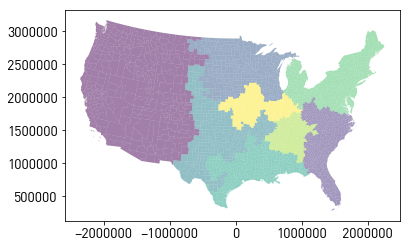

In [57]:
contig.plot('composite_labels_',linewidth=0)

In [58]:
contig.groupby('composite_labels_').count().geoid

composite_labels_
0    400
1    490
2    422
3    388
4    336
5    510
6    260
7    299
Name: geoid, dtype: int64

In [59]:
contig.groupby('8labels_').count().geoid

8labels_
0     689
1    1159
2     295
3     269
4     162
5     242
6     132
7     157
Name: geoid, dtype: int64

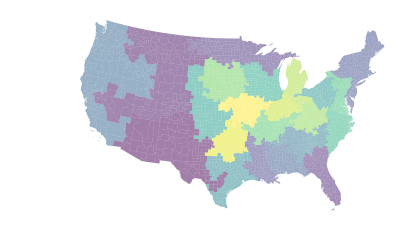

In [48]:
contig.plot('labels_',linewidth=0)
plt.gca().axis('off')
plt.show()

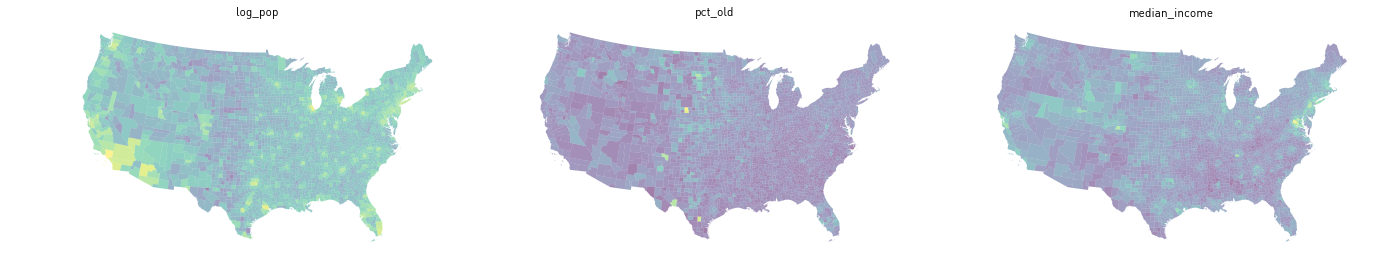

In [49]:
f,ax = plt.subplots(1,len(attributes),figsize=(4*len(attributes)*1.6,4))
for i,name in enumerate(attributes):
    contig.plot(name, linewidth=0, ax=ax[i])
    ax[i].set_title(name)
    ax[i].axis('off')
f.tight_layout()
plt.show()

In [50]:
skater_._trace[-1]

(array([ 0,  1,  1, ..., 13, 13,  1], dtype=int32),
 deletion(in_node=1327, out_node=231, score=5914.5114499296815))

In [51]:
[x[0] for x in skater_._trace]

[array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 array([0, 0, 0, ..., 2, 2, 0], dtype=int32),
 array([0, 0, 0, ..., 2, 2, 0], dtype=int32),
 array([0, 0, 0, ..., 7, 7, 0], dtype=int32),
 array([0, 0, 0, ..., 8, 8, 0], dtype=int32),
 array([0, 0, 0, ..., 8, 8, 0], dtype=int32),
 array([0, 1, 1, ..., 9, 9, 1], dtype=int32),
 array([0, 1, 1, ..., 9, 9, 1], dtype=int32),
 array([0, 1, 1, ..., 9, 9, 1], dtype=int32),
 array([ 0,  1,  1, ..., 10, 10,  1], dtype=int32),
 array([ 0,  1,  1, ..., 11, 11,  1], dtype=int32),
 array([ 0,  1,  1, ..., 11, 11,  1], dtype=int32),
 array([ 0,  1,  1, ..., 11, 11,  1], dtype=int32),
 array([ 0,  1,  1, ..., 11, 11,  1], dtype=int32),
 array([ 0,  1,  1, ..., 11, 11,  1], dtype=int32),
 array([ 0,  1,  1, ..., 12, 12,  1], dtype=

In [52]:
labeltrace = np.vstack([i[0] for i in skater_._trace]).T

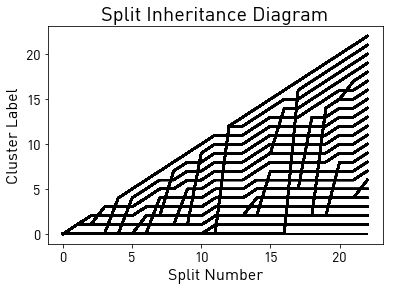

In [57]:
plt.plot(labeltrace.T, color='k', linewidth=2)
plt.title("Split Inheritance Diagram", fontsize=20)
plt.ylabel("Cluster Label", fontsize=16)
plt.xlabel("Split Number", fontsize=16)
plt.savefig('clades.png')
plt.show()

In [58]:
MST = spar.csgraph.minimum_spanning_tree(W_contig.sparse.multiply(skater_.metric(Xc)))

In [59]:
centroids = np.vstack(contig.geometry.apply(lambda x: np.hstack(x.centroid.xy)).values)
nonzeros = np.vstack(MST.nonzero()).T

# Want to force another split at a reduced quorum?

In [61]:
np.unique(skater_.current_labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22], dtype=int32),
 array([149, 170, 144, 134, 108, 155, 114, 162, 114, 101, 131, 111, 132,
        161, 136, 114, 149, 157, 162, 131, 110, 107, 153]))

In [62]:
s,n,l = skater_.find_cut(copy.deepcopy(skater_.minimum_spanning_forest_), 
                         data = Xc,
                         labels=skater_.current_labels_, 
                         quorum=50,
                         target_label=0, make=True)

In [63]:
s, n, l

(<3105x3105 sparse matrix of type '<class 'numpy.float64'>'
 	with 3081 stored elements in Compressed Sparse Row format>,
 24,
 array([ 0,  1,  1, ..., 14, 14,  1], dtype=int32))

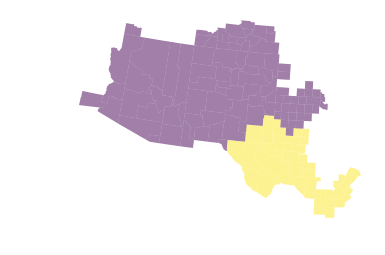

In [64]:
contig.assign(new_labels=l).query('labels_ ==0').plot('new_labels',linewidth=0)
plt.gca().axis('off')
plt.show()

# This takes forever to run, but shows the MST, target cut, and the regions at each iteation:

In [ ]:
f,ax = plt.subplots(len(labeltrace.T),1, figsize=(4*1.6, 4*len(labeltrace.T)))
for i,split in enumerate(labeltrace.T):
    deletion = skater_._trace[i][1]
    contig[['geometry']].assign(label=split).plot('label', linewidth=0, ax=ax[i])
    [ax[i].plot(*np.vstack((centroids[a], centroids[b])).T, color='k', linewidth=.5) 
     for (a,b) in nonzeros if (a != deletion.out_node) and (b != deletion.in_node)];
    if deletion.out_node is not np.nan:
        ax[i].plot(*np.vstack((centroids[deletion.out_node], centroids[deletion.in_node])).T, color='r', linewidth=2)
    ax[i].set_title(i, fontsize=20)
    ax[i].axis('off')
f.tight_layout()
plt.savefig('descendents.png', dpi=300)
plt.show()